<img style="float: left; padding-right: 0px; width: 145px" src="https://upload.wikimedia.org/wikipedia/fr/thumb/e/e9/EPF_logo_2021.png/524px-EPF_logo_2021.png"> 
<br><br>


###  <div style="text-align: right">  Data Engineering - P2024 <br> <br>  <time datetime="2023-12-16">2023/12/16 </time> <br> <br> <u>Name </u>: GAUBIL Clara, RAGEOT Pierre </div>
<br> 



#   <center>  Time Series Analysis </center>


#  <center><u>  Final TSA report  : Airline Baggage Complaints </u></center>

This report will outline the steps of a time series analysis project including the seasonality/trend recognition, the exploration of decomposition tecnhiques, the recognition of a multiplicative or additive model and the forecasting methods. For that, we will use the Airline Baggage Complaints data set. 

The data set contains monthly observations from 2004 to 2010 for United Airlines, American Eagle, and Hawaiian Airlines. The variables in the data set include:

Baggage - The total number of passenger complaints for theft of baggage contents, or for lost, damaged, or misrouted luggage for the airline that month
Scheduled - The total number of flights scheduled by that airline that month
Cancelled - The total number of flights cancelled by that airline that month
Enplaned - The total number of passengers who boarded a plane with the airline that month

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                
import seaborn as sns  
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import plotly.express as px
import scipy.stats as stats

## <u>**1- Data exploration and cleaning**</u>

### **1-1: Load data and data cleaning**

In [206]:
# open the csv file
path = 'baggagecomplaints.csv'
df_baggage = pd.read_csv(path)

In [207]:
df_baggage.head(15)

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581
5,American Eagle,06/2004,6,2004,13684,39879,1580,1347303
6,American Eagle,07/2004,7,2004,14121,41586,1819,1396642
7,American Eagle,08/2004,8,2004,12732,42016,1465,1339264
8,American Eagle,09/2004,9,2004,7895,40871,1077,1292147
9,American Eagle,10/2004,10,2004,9444,42381,1090,1393881


In [208]:
df_baggage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Airline    252 non-null    object
 1   Date       252 non-null    object
 2   Month      252 non-null    int64 
 3   Year       252 non-null    int64 
 4   Baggage    252 non-null    int64 
 5   Scheduled  252 non-null    int64 
 6   Cancelled  252 non-null    int64 
 7   Enplaned   252 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 15.9+ KB


The dates are not a the right format. We need to convert them to datetime format for easier analysis.

In [209]:
df_baggage['Date'] = pd.to_datetime(df_baggage['Date'])

<ipython-input-209-abde81cfd1f6>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In this notebook we will focus only on the baggages complaints so we will drop all other features to have a clean dataset

In [210]:
df_baggage.drop(columns=['Scheduled', 'Cancelled', 'Enplaned'], inplace=True)
df_baggage.head(15)

,Airline,Date,Month,Year,Baggage
0,American Eagle,2004-01-01,1,2004,12502
1,American Eagle,2004-02-01,2,2004,8977
2,American Eagle,2004-03-01,3,2004,10289
3,American Eagle,2004-04-01,4,2004,8095
4,American Eagle,2004-05-01,5,2004,10618
5,American Eagle,2004-06-01,6,2004,13684
6,American Eagle,2004-07-01,7,2004,14121
7,American Eagle,2004-08-01,8,2004,12732
8,American Eagle,2004-09-01,9,2004,7895
9,American Eagle,2004-10-01,10,2004,9444


In [211]:
df_baggage.describe()

,Date,Month,Year,Baggage
count,252,252.000000,252.00000,252.000000
mean,2007-06-16 21:08:34.285714176,6.500000,2007.00000,12613.507937
min,2004-01-01 00:00:00,1.000000,2004.00000,1033.000000
25%,2005-09-23 12:00:00,3.750000,2005.00000,1910.500000
50%,2007-06-16 00:00:00,6.500000,2007.00000,12224.000000
75%,2009-03-08 18:00:00,9.250000,2009.00000,19359.250000
max,2010-12-01 00:00:00,12.000000,2010.00000,41787.000000
std,NaN,3.458922,2.00398,9993.307166


We need to modifiy the date column to have it in a more usable format:

In [212]:
df_baggage['Airline'].value_counts()

Airline
American Eagle    84
Hawaiian          84
United            84
Name: count, dtype: int64

Each airline has 84 observations, there are no duplicates in dataset or missing values.

### **1-2: first observations, analysis**  

In this part we will have a first look at the dataset distribution and see if we can "visually" (without statistical analysis) recognize trend/seasonality or deduce if the model is eather additive of multiplicative

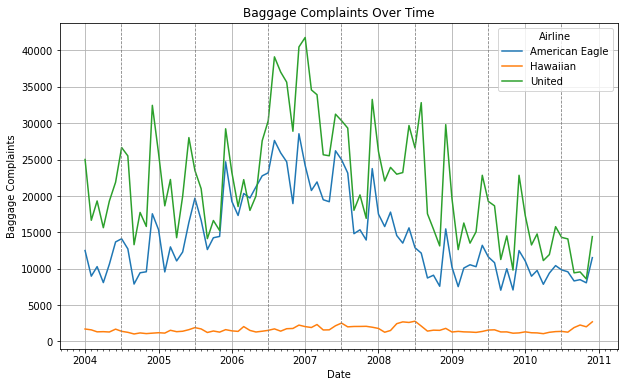

In [213]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Baggage', hue='Airline', data=df_baggage)

# Set locator for x-axis ticks (showing only years, adjust as needed)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_minor_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

# Midpoint of each year
for year in df_baggage['Date'].dt.year.unique():
    mid_date = pd.to_datetime(f'{year}-06-30') 
    plt.axvline(mid_date, linestyle='--', color='grey', linewidth=0.8)

plt.title('Baggage Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Baggage Complaints')
plt.grid(True)
plt.show()


After a first visualization of the data, it seems that we have a seasonality in the data related to American Eagle and Hawaiian airlines. Indeed, for these two airlines, baggage complaints seem to first decrease, then decrease a little, then decrease a little, then increase a lot over a period of about half a year. The time series for Hawaiian passengers is relatively flat compared to American Eagle and United, so it’s difficult to detect a pattern over time.  

Concerning the trends, the one of the Hawaiian airline is flat, whereas we can see that trends in baggage complaints for the other two companies seem to be more difficult to analyze from these charts because of the many fluctuations. 

Finally, the model seems additive since the lines connecting the lowest points and the highest poitns of each curves seem to be more or less parallel.

## <u>**2- Saisonality:**</u>

Let's dig more into the seasonality recognition with useful tools as the Buys-Ballot table and the fisher test. We will first zoom on some period to try deducing some seasonality.

### **2-1: visual exploration of seasonality** 

As the time series for hawaiaan airline is relatively flat, it is difficult to detect a pattern over time. In this way, we will display the curves separately for each airline and try to analyze the seasonality of the data.

In [214]:
fig = px.line(df_baggage, y="Baggage", x = 'Date',color="Airline", facet_col="Airline", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(
    mirror=True,
    ticks=None,
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title='',
    matches=None,
    visible=False
)
fig.show()

In [215]:
df_baggage['Year-Month'] = df_baggage['Year'].astype(str) + '-' + df_baggage['Month'].astype(str)

fig = px.line(df_baggage, y="Baggage", x='Month', color="Airline", facet_col="Airline", 
              line_group="Year", color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(plot_bgcolor='white')

fig.update_yaxes(
    mirror=True,
    ticks=None,
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title='',
    matches=None,
    visible=False
)

fig.update_xaxes(
    dtick=1
)

fig.show()


By focusing separately on the 3 airlines, we better observe the time series data of the Hawaiian airline. Nevertheless, the fluctuations are importants and it is still difficult to detect a pattern over time. The above graph shows the data repartition over the months for each airline company and for each year (a single curve = a year). Again, it is difficult to detect a pattern but still it seems easier to detect some for the United Airline. Indeed, we can distinguish a drop in the number of baggage complaints followed by a small increase, a small drop followed by a large increase, and this happens a second time every year.  

We will further explore this in the next cells by studying the Buys-Ballot table and by applying a fisher test.

### **2-2: Buys-Ballot table**

The Buys-Ballot table is a statistical method that is used to determine if a time series is seasonal. We will use it to detect the seasonal variations in our dataset. In a first time, we will explore the buys ballot with periods corresponding to months.

In [216]:
airlines = df_baggage['Airline'].unique()

BBT_Hawaiian = pd.DataFrame()
BBT_Eagle = pd.DataFrame()
BBT_United = pd.DataFrame()

for airline in airlines:
    df_airline = df_baggage[df_baggage['Airline'] == airline]

    # Create a Buys-Ballot table
    buys_ballot_table = pd.pivot_table(df_airline, values='Baggage', index='Year', columns='Month', aggfunc='sum')

    # columns for mean and std for each month
    buys_ballot_table['Mean'] = buys_ballot_table.mean(axis=1)
    buys_ballot_table['Std'] = buys_ballot_table.std(axis=1)

    # rows for mean and std for each month
    buys_ballot_table.loc['Mean'] = buys_ballot_table.mean(axis=0)
    buys_ballot_table.loc['Std'] = buys_ballot_table.std(axis=0)

    # Assign the Buys-Ballot table to the corresponding airline DataFrame
    if airline == 'Hawaiian':
        BBT_Hawaiian = buys_ballot_table
    elif airline == 'American Eagle':
        BBT_Eagle = buys_ballot_table
    elif airline == 'United':
        BBT_United = buys_ballot_table

In [217]:
print("Buys-Ballot table of the United airline:")
display(BBT_United)


Buys-Ballot table of the United airline:


Month,1,2,3,4,5,6,7,8,9,10,11,12,Mean,Std
Year,,,,,,,,,,,,,,
2004,25015.000000,16660.000000,19318.000000,15638.000000,19302.000000,21892.000000,26666.000000,25510.000000,13305.000000,17736.000000,15812.000000,32458.000000,20776.000000,5401.575650
2005,25861.000000,18647.000000,22264.000000,14262.000000,19977.000000,28024.000000,23513.000000,21000.000000,14138.000000,16628.000000,15254.000000,29235.000000,20733.583333,4992.026800
2006,23232.000000,18551.000000,22246.000000,18019.000000,19996.000000,27588.000000,30325.000000,39123.000000,37039.000000,35640.000000,28896.000000,40483.000000,28428.166667,7813.493252
2007,41787.000000,34581.000000,33920.000000,25667.000000,25524.000000,31242.000000,30356.000000,29331.000000,18033.000000,20147.000000,16927.000000,33269.000000,28398.666667,7114.075383
2008,26113.000000,22059.000000,23932.000000,22994.000000,23217.000000,29690.000000,26604.000000,32827.000000,17551.000000,15429.000000,13138.000000,29803.000000,23613.083333,5714.367017
2009,19653.000000,12627.000000,16285.000000,13517.000000,15083.000000,22844.000000,19259.000000,18646.000000,11270.000000,14513.000000,9814.000000,22845.000000,16363.000000,4127.096800
2010,17307.000000,13269.000000,14782.000000,11121.000000,11947.000000,15784.000000,14309.000000,14099.000000,9435.000000,9565.000000,8597.000000,14415.000000,12885.833333,2627.581234
Mean,25566.857143,19484.857143,21821.000000,17316.857143,19292.285714,25294.857143,24433.142857,25790.857143,17253.000000,18522.571429,15491.142857,28929.714286,21599.761905,5398.602305
Std,7294.154968,6863.367945,5827.016169,4890.604912,4257.314637,5006.211211,5472.126446,8022.874893,8572.300425,7613.316883,6178.389814,7684.056940,5367.770968,1618.414128


In [218]:
print("Buys-Ballot table of the American Eagle airline:")
display(BBT_Eagle)

Buys-Ballot table of the American Eagle airline:


Month,1,2,3,4,5,6,7,8,9,10,11,12,Mean,Std
Year,,,,,,,,,,,,,,
2004,12502.000000,8977.000000,10289.000000,8095.000000,10618.000000,13684.000000,14121.000000,12732.000000,7895.000000,9444.000000,9582.000000,17555.000000,11291.166667,2759.935049
2005,15361.000000,9561.000000,13002.000000,11071.000000,12300.000000,16373.000000,19701.000000,16666.000000,12636.000000,14258.000000,14440.000000,24696.000000,15005.416667,3912.127479
2006,19255.000000,17319.000000,20344.000000,19726.000000,21248.000000,22767.000000,23184.000000,27630.000000,25922.000000,24699.000000,18954.000000,28556.000000,22467.000000,3463.158674
2007,24190.000000,20753.000000,21928.000000,19483.000000,19209.000000,26213.000000,24993.000000,23156.000000,14816.000000,15351.000000,13946.000000,23762.000000,20650.000000,3983.775784
2008,17507.000000,15795.000000,17782.000000,14566.000000,13522.000000,15620.000000,12885.000000,12148.000000,8729.000000,9110.000000,7591.000000,15475.000000,13394.166667,3268.702669
2009,10231.000000,7538.000000,10093.000000,10547.000000,10279.000000,13220.000000,11625.000000,10832.000000,7052.000000,10000.000000,7081.000000,12496.000000,10082.833333,1905.271146
2010,11059.000000,8973.000000,9762.000000,7864.000000,9399.000000,10431.000000,9840.000000,9583.000000,8324.000000,8498.000000,8067.000000,11526.000000,9443.833333,1116.545628
Mean,15729.285714,12702.285714,14742.857143,13050.285714,13796.428571,16901.142857,16621.285714,16106.714286,12196.285714,13051.428571,11380.142857,19152.285714,14619.202381,2915.645204
Std,4625.524487,4781.150212,4803.763478,4627.229832,4291.994969,5193.440848,5526.551824,6327.185308,6180.994897,5358.612450,4146.601480,6082.201216,4751.649819,988.517007


In [219]:
print("Buys-Ballot table of the Hawaiian airline:")
display(BBT_Hawaiian)

Buys-Ballot table of the Hawaiian airline:


Month,1,2,3,4,5,6,7,8,9,10,11,12,Mean,Std
Year,,,,,,,,,,,,,,
2004,1717.000000,1599.000000,1327.000000,1350.000000,1304.000000,1697.000000,1398.000000,1259.000000,1033.000000,1176.000000,1084.000000,1146.000000,1340.833333,218.414298
2005,1206.000000,1154.000000,1541.000000,1348.000000,1408.000000,1625.000000,1906.000000,1726.000000,1236.000000,1443.000000,1286.000000,1629.000000,1459.000000,221.010558
2006,1461.000000,1388.000000,2049.000000,1522.000000,1305.000000,1411.000000,1530.000000,1733.000000,1421.000000,1757.000000,1790.000000,2252.000000,1634.916667,276.970052
2007,2046.000000,1922.000000,2331.000000,1583.000000,1601.000000,2163.000000,2529.000000,2013.000000,2064.000000,2069.000000,2086.000000,1962.000000,2030.750000,252.286254
2008,1795.000000,1273.000000,1511.000000,2449.000000,2696.000000,2618.000000,2791.000000,2121.000000,1428.000000,1556.000000,1532.000000,1803.000000,1964.416667,523.203029
2009,1303.000000,1389.000000,1323.000000,1300.000000,1251.000000,1381.000000,1573.000000,1604.000000,1313.000000,1319.000000,1140.000000,1179.000000,1339.583333,131.128092
2010,1326.000000,1200.000000,1180.000000,1076.000000,1264.000000,1360.000000,1386.000000,1283.000000,1912.000000,2265.000000,2020.000000,2705.000000,1581.416667,494.611204
Mean,1550.571429,1417.857143,1608.857143,1518.285714,1547.000000,1750.714286,1873.285714,1677.000000,1486.714286,1655.000000,1562.571429,1810.857143,1621.559524,302.517641
Std,285.699571,246.913188,391.785812,409.008108,482.220459,438.439673,527.066197,304.925752,342.424847,368.584551,381.718991,519.801453,259.538352,137.253157


-> The mean column represent the average periodic value of the time series.  
-> The mean row represent the average number of baggage complaints for each months across all years.  
-> The "Std" row and column indicate the standard deviation, which measures the amount of variation or dispersion from the mean.  

We can see that 2 patterns recur throughout the year. Indeed, the number of baggage complaints seems to be high in January, then drops in February before rising a little in March and then dropping again in April. Then, between April-June or April-July, the number of baggage complaints increases before reaching a peak. The same pattern is repeated over the other half of the year (a lot of complaints, then less, then a little more, then a little less, then a lot). This could make sense, as the peaks in baggage complaints seem to be during the summer or at the end of the year, which could also correspond to the periods when airlines have the most passengers.  

In this way, the Buys Ballot table with monthly periods reveals intriguing insights into the seasonality of baggage complaints. Across the months, distinct patterns emerge, showcasing a regular ebb and flow in the number of complaints. Notably, there is a conspicuous surge in baggage complaints during January, followed by a decline in February, a modest rise in March, and another dip in April. This cyclic behavior repeats in both halves of the year, forming a distinctive seasonal rhythm. Moreover, the data suggests that specific periods, potentially corresponding to summer or year-end travel peaks, experience higher concentrations of baggage complaints. The standard deviation values accentuate the variability in certain months, emphasizing the unpredictability and fluctuation in baggage complaint numbers during these periods. 

### **2-3: fisher test**

Now, we will conduct a fisher test in order to determine whether the data have an influence on the seasonality or not.

In [220]:
def fisher_test(buys_ballot_table):
    # Extract the standard deviation values for each month
    std_values = buys_ballot_table.loc['Std'][:-1].values

    # Calculate the mean standard deviation
    mean_std = std_values.mean()

    # Calculate the Fisher test statistic
    f_statistic = (mean_std**2) / (std_values**2).mean()

    # Calculate the p-value for the Fisher test
    p_value = stats.f.cdf(f_statistic, len(std_values)-1, len(std_values)*(len(buys_ballot_table)-2))

    return f_statistic, p_value

# Perform Fisher test for each airline
f_statistic_hawaiian, p_value_hawaiian = fisher_test(BBT_Hawaiian)
f_statistic_eagle, p_value_eagle = fisher_test(BBT_Eagle)
f_statistic_united, p_value_united = fisher_test(BBT_United)

alpha = 0.05

# Print the results
print("Hawaiian Airlines - Fisher Test:")
print(f"Fisher Test Statistic: {f_statistic_hawaiian}")
print(f"P-value: {p_value_hawaiian}")
if p_value_hawaiian < alpha:
    print("Reject the null hypothesis: Seasonality is present.")
else:
    print("Fail to reject the null hypothesis: Seasonality is not significant.\n")

print("American Eagle Airlines - Fisher Test:")
print(f"Fisher Test Statistic: {f_statistic_eagle}")
print(f"P-value: {p_value_eagle}")
if p_value_eagle < alpha:
    print("Reject the null hypothesis: Seasonality is present.")
else:
    print("Fail to reject the null hypothesis: Seasonality is not significant.\n")

print("United Airlines - Fisher Test:")
print(f"Fisher Test Statistic: {f_statistic_united}")
print(f"P-value: {p_value_united}")
if p_value_united < alpha:
    print("Reject the null hypothesis: Seasonality is present.")
else:
    print("Fail to reject the null hypothesis: Seasonality is not significant.\n")




Hawaiian Airlines - Fisher Test:
Fisher Test Statistic: 0.9477323293646116
P-value: 0.49593950530465497
Fail to reject the null hypothesis: Seasonality is not significant.

American Eagle Airlines - Fisher Test:
Fisher Test Statistic: 0.9821871262642465
P-value: 0.5281630359476059
Fail to reject the null hypothesis: Seasonality is not significant.

United Airlines - Fisher Test:
Fisher Test Statistic: 0.9591401576509307
P-value: 0.5067112195222129
Fail to reject the null hypothesis: Seasonality is not significant.



As we conduct a fisher test, our hypothesis are the following:
- H0: no association between the seasonality and the data, data don't influence the seasonality
- H1: there is an association between the seasonality and the data, data influence the seasonality  

Based on the results of Fisher's test, we can deduce that the time series given has no influence on seasonality. In other words, based on the Fisher tests, there is no strong indication enoought that the variability across seasons is significantly different. The fisher test shows that the data does not show a consistent and statistically significant pattern that repeats across seasons.

## <u>**3- Trend:**</u>

The idea now is to visualize the trend of our data for different period. Firstly, we will analyze the "raw" data with linear regression method then we will apply a rolling window in order to smooth the data.

### 6 Years period - All Buys Ballot table 

***Without rolling window***

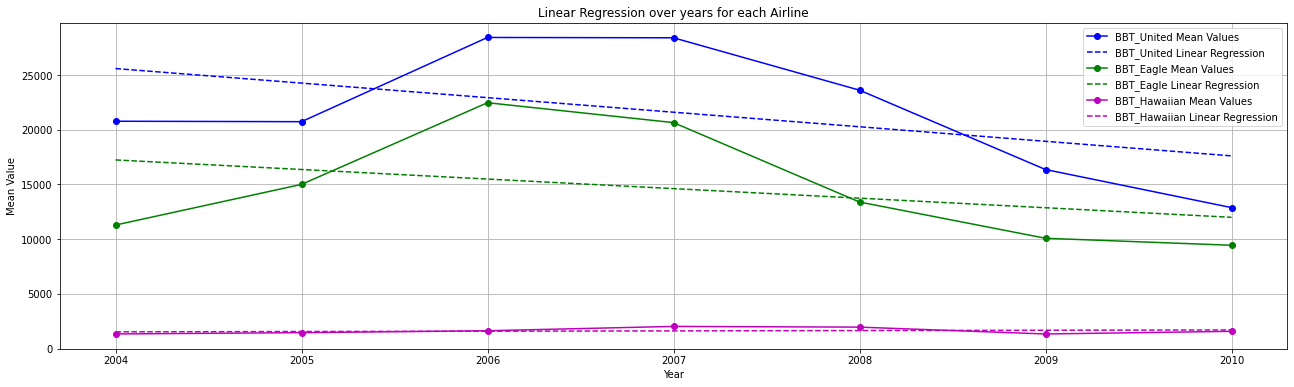

In [221]:
tables = [BBT_United, BBT_Eagle, BBT_Hawaiian]
colors = ['b', 'g', 'm']  
labels = ['BBT_United', 'BBT_Eagle', 'BBT_Hawaiian']  

plt.figure(figsize=(22, 6))

for df, color, label in zip(tables, colors, labels):
    years = pd.to_numeric(df.index[:-2], errors='coerce')  
    mean_values = df['Mean'][:-2].values

    # Original data
    plt.plot(years, mean_values, marker='o', linestyle='-', color=color, label=f'{label} Mean Values')

    # Perform linear regression
    coefficients = np.polyfit(years, mean_values, 1)
    polynomial = np.poly1d(coefficients)
    regression_line = polynomial(years)

    # Regression line plot
    plt.plot(years, regression_line, linestyle='--', color=color, label=f'{label} Linear Regression')

plt.title('Linear Regression over years for each Airline')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()

***With rolling window*** 

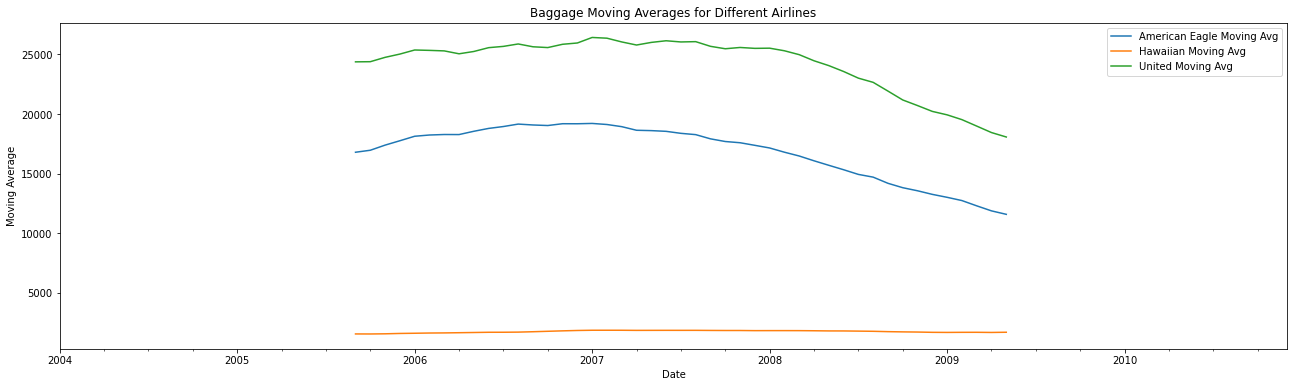

In [222]:
# Group by Airline and create separate DataFrames
grouped_airlines = df_baggage.groupby('Airline')

# Dictionary to store DataFrames for each airline
airline_dfs = {}
for airline, group in grouped_airlines:
    airline_dfs[airline] = group[['Date', 'Baggage']]

for airline, df in airline_dfs.items():
    df.set_index('Date', inplace=True)

plt.figure(figsize=(22, 6))

for airline, df in airline_dfs.items():
    moving_avg = df['Baggage'].rolling(window=40, center=True).mean()
    moving_avg.plot(label=f'{airline} Moving Avg')

plt.legend()
plt.title('Baggage Moving Averages for Different Airlines')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.show()

The conclusion that can be drawn is that there is a general trend in the "raw" data of United and American Eagle airlines, as the number of abandoned baggage complaints seems to be decreasing (although it did increase between 2004/2005 and 2007). 

### 1 Year period - United airline Buys Ballot's table

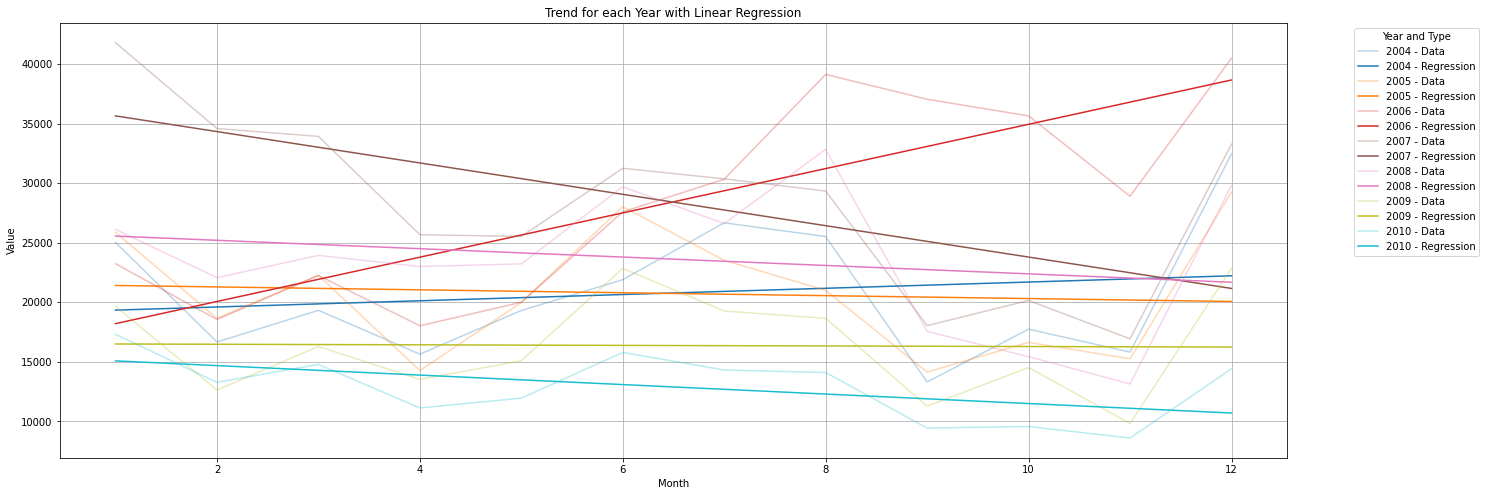

In [223]:
from scipy.stats import linregress
import matplotlib.cm as cm

six_months = BBT_United.iloc[:7, -14:-2]

plt.figure(figsize=(22, 8))

# Define a colormap for assigning unique colors to each year
colors = cm.tab10(np.linspace(0, 1, len(six_months.index)))

for i, year in enumerate(six_months.index):
    x = np.arange(1, 13)  
    y = six_months.loc[year, :].values

    # Perform linear regression
    slope, intercept, _, _, _ = linregress(x, y)

    # Original plot
    plt.plot(x, y, label=f'{year} - Data', alpha=0.3, color=colors[i])

    # Linear regression line with the same color and a legend
    plt.plot(x, intercept + slope * x, linestyle='-', color=colors[i], label=f'{year} - Regression')

plt.title('Trend for each Year with Linear Regression')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Year and Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### 1 Year period - Hawaiian airline Buys Ballot's table

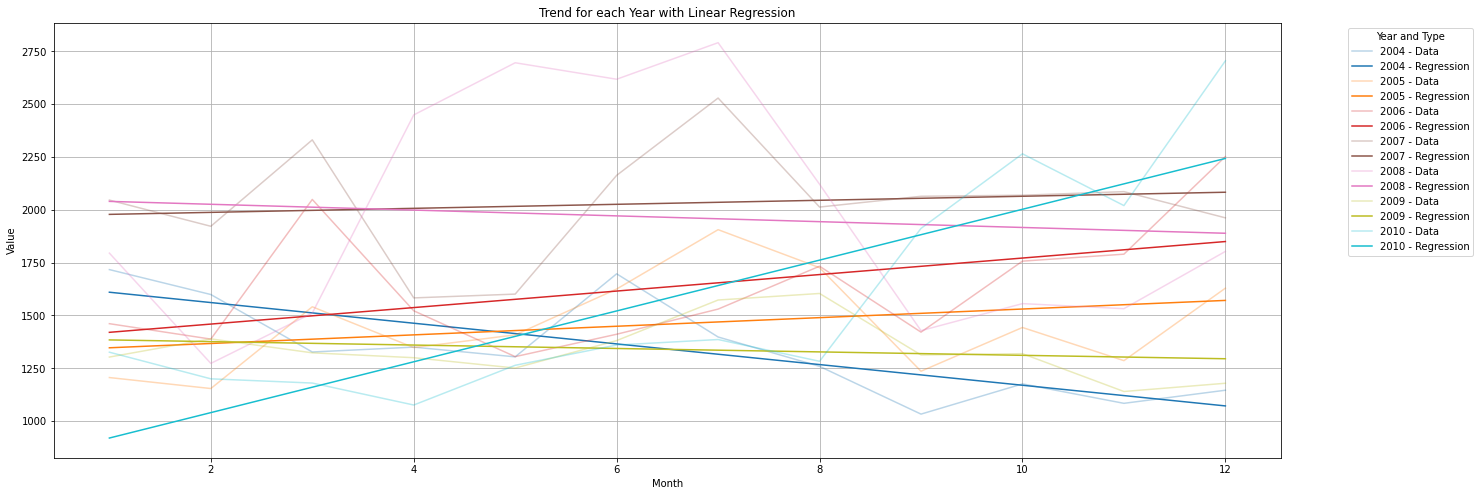

In [224]:
six_months = BBT_Hawaiian.iloc[:7, -14:-2]

plt.figure(figsize=(22, 8))

# Define a colormap for assigning unique colors to each year
colors = cm.tab10(np.linspace(0, 1, len(six_months.index)))

for i, year in enumerate(six_months.index):
    x = np.arange(1, 13)  
    y = six_months.loc[year, :].values

    # Perform linear regression
    slope, intercept, _, _, _ = linregress(x, y)

    # Original plot
    plt.plot(x, y, label=f'{year} - Data', alpha=0.3, color=colors[i])

    # Linear regression line with the same color and a legend
    plt.plot(x, intercept + slope * x, linestyle='-', color=colors[i], label=f'{year} - Regression')

plt.title('Trend for each Year with Linear Regression')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Year and Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 1 Year period - American Eagle airline Buys Ballot's table

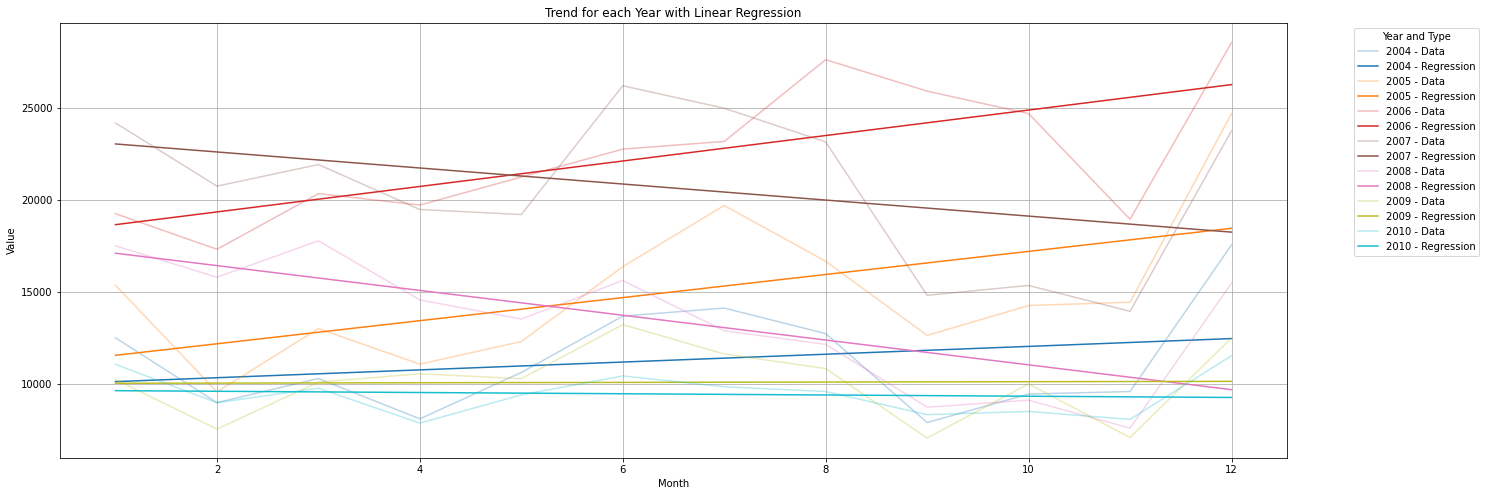

In [225]:
six_months = BBT_Eagle.iloc[:7, -14:-2]

plt.figure(figsize=(22, 8))

# Define a colormap for assigning unique colors to each year
colors = cm.tab10(np.linspace(0, 1, len(six_months.index)))

for i, year in enumerate(six_months.index):
    x = np.arange(1, 13)  
    y = six_months.loc[year, :].values

    # Perform linear regression
    slope, intercept, _, _, _ = linregress(x, y)

    # Original plot
    plt.plot(x, y, label=f'{year} - Data', alpha=0.3, color=colors[i])

    # Linear regression line with the same color and a legend
    plt.plot(x, intercept + slope * x, linestyle='-', color=colors[i], label=f'{year} - Regression')

plt.title('Trend for each Year with Linear Regression')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Year and Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The 1 year visualization does not give too much details except that a close look at the various linear regressions confirms the general trend over the 6 years. 

## <u>**4- Additive or Multiplicative model ?:**</u>

In this part, we will study the correlation between the mean and the standard deviation of our data.  
If theses two are not correlated, then our model is additive. Moreover, if the variability of the time series remains relatively constant across different levels of the mean, it suggests an additive relationship.  
Otherwise, if the variability of the time series increases or decreases with the level of the mean, it suggests a multiplicative relationship.

In [226]:
airlines = [BBT_Eagle, BBT_United, BBT_Hawaiian]

for airline in airlines:
    correlation = airline["Std"].corr(airline["Mean"])
    print(correlation)

0.8434205427475312
0.9842893442057311
0.5775387596547747


The correlation factor is near to 1 for the the American Eagles and United Airlines, it indicates that the model seems multiplicative.

MSE for American Eagle: 7721446.788387347
MSE for United: 25542732.576919366


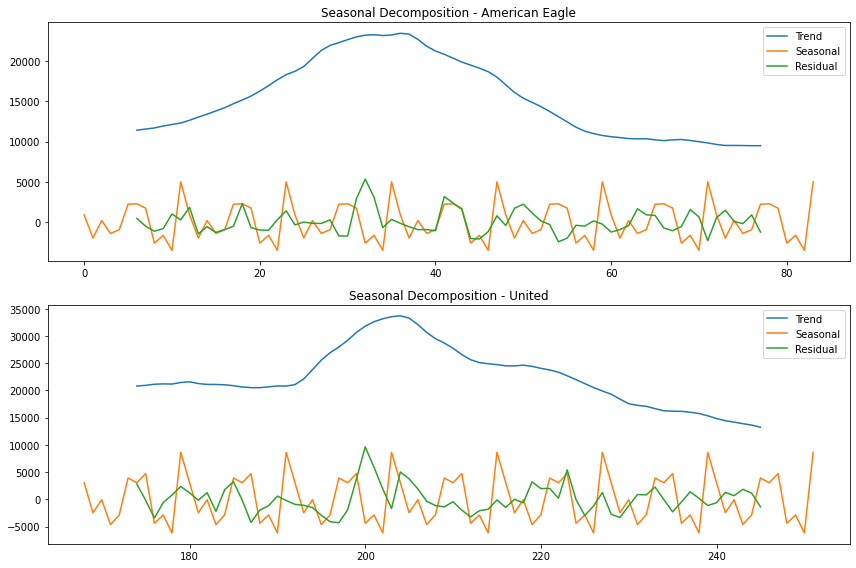

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for American Eagle
result_ae = seasonal_decompose(df_baggage[df_baggage['Airline'] == 'American Eagle']['Baggage'], model='additive', period=12)
trend_ae = result_ae.trend.dropna()

# Decompose the time series for United
result_united = seasonal_decompose(df_baggage[df_baggage['Airline'] == 'United']['Baggage'], model='additive', period=12)
trend_united = result_united.trend.dropna()

# Calculate MSE for American Eagle
mse_ae = ((df_baggage[df_baggage['Airline'] == 'American Eagle']['Baggage'].loc[trend_ae.index] - trend_ae) ** 2).mean()

# Calculate MSE for United
mse_united = ((df_baggage[df_baggage['Airline'] == 'United']['Baggage'].loc[trend_united.index] - trend_united) ** 2).mean()

print("MSE for American Eagle:", mse_ae)
print("MSE for United:", mse_united)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.title('Seasonal Decomposition - American Eagle')
result_ae.trend.plot(label='Trend')
result_ae.seasonal.plot(label='Seasonal')
result_ae.resid.plot(label='Residual')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Seasonal Decomposition - United')
result_united.trend.plot(label='Trend')
result_united.seasonal.plot(label='Seasonal')
result_united.resid.plot(label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


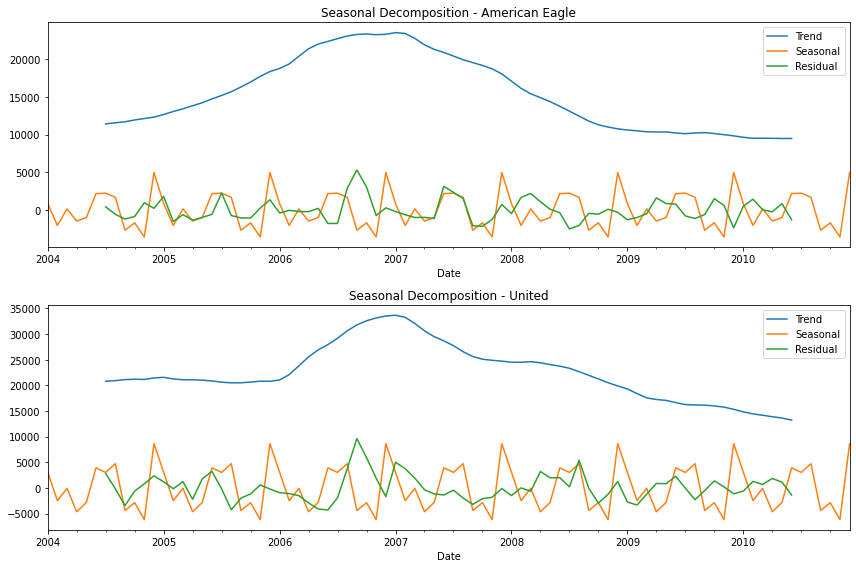

In [228]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Date' column is not in datetime format
df_baggage['Date'] = pd.to_datetime(df_baggage['Date'])

# Set 'Date' column as the index
df_baggage.set_index('Date', inplace=True)

# Decompose the time series for American Eagle
result_ae = seasonal_decompose(df_baggage[df_baggage['Airline'] == 'American Eagle']['Baggage'], model='additive', period=12)

# Decompose the time series for United
result_united = seasonal_decompose(df_baggage[df_baggage['Airline'] == 'United']['Baggage'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.title('Seasonal Decomposition - American Eagle')
result_ae.trend.plot(label='Trend')
result_ae.seasonal.plot(label='Seasonal')
result_ae.resid.plot(label='Residual')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Seasonal Decomposition - United')
result_united.trend.plot(label='Trend')
result_united.seasonal.plot(label='Seasonal')
result_united.resid.plot(label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [229]:
from statsmodels.stats.libqsturng import qsturng
from statsmodels.stats import anova

# Perform Fisher test
_, pvalue = anova.fisher_test(result_ae.resid, result_united.seasonal)

# Significance level (e.g., 0.05)
alpha = 0.05

# Compare p-value to significance level
if pvalue < alpha:
    print("Reject the null hypothesis: Seasonality is present.")
else:
    print("Fail to reject the null hypothesis: Seasonality is not significant.")


AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
from scipy.stats import f_oneway

# Extract the seasonal component for American Eagle and United
seasonal_ae = result_ae.seasonal.dropna()
seasonal_united = result_united.seasonal.dropna()

# Perform Fisher test for seasonality
f_stat, p_value = f_oneway(seasonal_ae, seasonal_united)

print(f'Fisher Statistic: {f_stat}')
print(f'P-value: {p_value}')

# Check the p-value
if p_value < 0.05:
    print('Reject the null hypothesis: Seasonality is present')
else:
    print('Fail to reject the null hypothesis: Seasonality is not confirmed')


Fisher Statistic: 5.450277011344869e-33
P-value: 1.0
Fail to reject the null hypothesis: Seasonality is not confirmed
